**Démenstration**

In [ ]:
# Import Packages
import os
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session

**Preprocessing**

In [ ]:
def clean_text(text):  
  
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى",
              "\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا",
               "","","","ي","",' ', ' ',' ',' ? ',' ؟ ', ' ! ']
    
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(tashkeel,"", text)
    
    longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(longation, subst, text)
    
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"[a-zA-Z]", '', text)
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    text = text.strip()
    
    return text



In [ ]:
data = pd.read_csv('/content/dataset.csv', encoding = 'utf-8')
data.head()

,text,polarity
0,المكان الذي يمكنك فيه مراجعة الذات والتفكر هو ...,1
1,موقع رائع وحديقة رائعة ويستحق نجمةّ إضافية \n...,0
2,أسوأ فندق أقمت فيه على الإطلاق \nيستغرق تسجيل...,-1
3,بدون روح كأنه فندق ثلاثة نجوم \nبدون إدارة اح...,0
4,فندق جميل مع سوء الإدارة والخدمات. \nمن الخار...,-1


In [ ]:
data.sum().isnull()

text        False
polarity    False
dtype: bool

**N'incluez que les snetiments positifs et négatifs:**

In [ ]:
data = data[data.polarity.isin([-1, 1])]

Appliquer le Preprocessing pour la preparation et nettoyage du texte:

In [ ]:
data['cleaned_text'] = data.text.apply(clean_text)

In [ ]:
data = data[data.cleaned_text != ""]
data.head(3)

,text,polarity,cleaned_text
0,المكان الذي يمكنك فيه مراجعة الذات والتفكر هو ...,1,المكان الذي يمكنك فيه مراجعه الذات والتفكر هو ...
2,أسوأ فندق أقمت فيه على الإطلاق \nيستغرق تسجيل...,-1,اسوا فندق اقمت فيه علي الاطلاق يستغرق تسجيل ال...
4,فندق جميل مع سوء الإدارة والخدمات. \nمن الخار...,-1,فندق جميل مع سوء الاداره والخدمات من الخارج بد...


**Équilibrer les données d'entrée**

In [ ]:
min_sample = data.groupby(['polarity']).count().text.min()
input_data = pd.concat([data[data.polarity == 1].head(min_sample), 
                        data[data.polarity == -1].head(min_sample)])
input_data.groupby(['polarity']).count()

,text,cleaned_text
polarity,,
-1,2645,2645
1,2645,2645


In [ ]:
X = input_data.cleaned_text.values

In [ ]:
X

array(['المكان الذي يمكنك فيه مراجعه الذات والتفكر هو كوكروبيت غانا ثمه الكثير عند زياره غانا وعلي الرغم من الفقر الذي سوف تلاحظه علي طريقك الي بيغ ميلي باكيارد وجدت ان الناس في غانا يملكون ثراء القلب حتي رغم العوز بيغ ميلي باكيارد هو مكان يمكنني فيه مراجعه الذات والتفكر التقيت اشخاصا كانوا يعملون علي مبادرات مختلفه بيغ ميلي هو مكان يمكننا فيه تبادل الملاحظات والاراء بيغ ميلي مليء بالسلام وهادئ للغايه الطعام ممتاز جدا الطهاه ممتازون وبالاضافه الي ذلك لا بد من الاشاره الي ان العمال الذين لا يكلون ويحرصون علي سعاده نزلائهم هم من يجعلون المكان مضيافا هناك خيبه امل واحده كبيره رغم ان الفنون والاشغال اليدويه يمكن شراؤها في الموقع الا ان الاسعار غاليه مؤخرا ازالت السلطات في كوكروبيت محلات التجار الواقعه خارج شاطئ بيغ ميلي كانت منتجات التجار ارخص لا يزال هناك محل تجاري متجر مايسترو للفن الافريقي في كوكروبيت يعرض الفنون والاشغال اليدويه الفريده والملابس واللوحات اشتريت لوحات مذهله لايمكنك ان تجدها في بيغ ميلي عندما تزور بيغ ميلي من فضلك خذ لحظه للذهاب الي الشاطئ وعلي يمينك ستجد متجر مايسترو لل

In [ ]:
Y = np.asarray(input_data.polarity.values).astype('float32')
Y = Y.clip(0, 1)

In [ ]:
Y

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

**Créer des séquences**

In [ ]:
num_words = 10000
embedding_dim = 100
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

vocab_size = len(tokenizer.word_index) + 1
print("vocab size:", vocab_size)



vocab size: 48682


In [ ]:
maxlen = 300 #Maximum number of words in a sequence
X = pad_sequences(X, padding='post', maxlen=maxlen)

In [ ]:
seed = 42
X_train, X_test, label_train, label_test = train_test_split(X, Y, test_size=0.3,
                                                            random_state=seed)

In [ ]:
print("Training:", len(X_train), len(label_train))
print("Testing: ", len(X_test), len(label_test))

Training: 3703 3703
Testing:  1587 1587


In [ ]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
cnn_model = Sequential()
embedding_layer =Embedding(input_dim=num_words, 
                           output_dim=embedding_dim, 
                           input_length=maxlen)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
#cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_history = cnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 296, 128)          64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,064,257
Trainable params: 1,064,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = cnn_model.fit(X_train, label_train,
                    epochs=4,
                    verbose=True,
                    validation_data=(X_test, label_test),
                    batch_size=64)


Epoch 1/4
58/58 [==============================] - 10s 157ms/step - loss: 0.6707 - acc: 0.6319 - val_loss: 0.4210 - val_acc: 0.8765
Epoch 2/4
58/58 [==============================] - 9s 153ms/step - loss: 0.3275 - acc: 0.8914 - val_loss: 0.2368 - val_acc: 0.9036
Epoch 3/4
58/58 [==============================] - 9s 151ms/step - loss: 0.1340 - acc: 0.9618 - val_loss: 0.2052 - val_acc: 0.9181
Epoch 4/4
58/58 [==============================] - 9s 152ms/step - loss: 0.0644 - acc: 0.9860 - val_loss: 0.2040 - val_acc: 0.9200


In [ ]:
loss, accuracy = cnn_model.evaluate(X_train, label_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss_val, accuracy_val = cnn_model.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

116/116 [==============================] - 2s 16ms/step - loss: 0.0280 - acc: 0.9970
Training Accuracy: 0.9970
50/50 [==============================] - 1s 16ms/step - loss: 0.2040 - acc: 0.9200
Testing Accuracy:  0.9200


In [ ]:
loss_val, accuracy_val = cnn_model.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

50/50 [==============================] - 1s 16ms/step - loss: 0.2040 - acc: 0.9200
Testing Accuracy:  0.9200


In [ ]:
from keras.layers import GRU
from keras.optimizers import Adam
gru_model = Sequential()
embedding_size = 8
gru_model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    input_length=maxlen,
                    name='layer_embedding'))
gru_model.add(GRU(units=16, return_sequences=True))
gru_model.add(GRU(units=8, return_sequences=True))
gru_model.add(GRU(units=4))
gru_model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=1e-3)

In [ ]:
gru_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 300, 100)          1000000   
_________________________________________________________________
gru (GRU)                    (None, 300, 16)           5664      
_________________________________________________________________
gru_1 (GRU)                  (None, 300, 8)            624       
_________________________________________________________________
gru_2 (GRU)                  (None, 4)                 168       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 1,006,461
Trainable params: 1,006,461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_hist = gru_model.fit(X_train, label_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)


Epoch 1/20
24/24 [==============================] - 16s 455ms/step - loss: 0.6936 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4710
Epoch 2/20
24/24 [==============================] - 10s 427ms/step - loss: 0.6930 - accuracy: 0.5039 - val_loss: 0.6947 - val_accuracy: 0.4696
Epoch 3/20
24/24 [==============================] - 10s 424ms/step - loss: 0.6928 - accuracy: 0.5134 - val_loss: 0.6933 - val_accuracy: 0.4710
Epoch 4/20
24/24 [==============================] - 10s 418ms/step - loss: 0.6931 - accuracy: 0.4916 - val_loss: 0.6930 - val_accuracy: 0.5331
Epoch 5/20
24/24 [==============================] - 10s 420ms/step - loss: 0.6929 - accuracy: 0.5054 - val_loss: 0.6949 - val_accuracy: 0.4710
Epoch 6/20
24/24 [==============================] - 10s 425ms/step - loss: 0.6932 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.4696
Epoch 7/20
24/24 [==============================] - 10s 437ms/step - loss: 0.6930 - accuracy: 0.5035 - val_loss: 0.6930 - val_accuracy: 0.5331

In [ ]:
loss, accuracy = gru_model.evaluate(X_train, label_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss_val, accuracy_val = gru_model.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))


116/116 [==============================] - 6s 50ms/step - loss: 0.6921 - accuracy: 0.4991
Training Accuracy: 0.4991
50/50 [==============================] - 3s 52ms/step - loss: 0.6925 - accuracy: 0.5142
Testing Accuracy:  0.5142


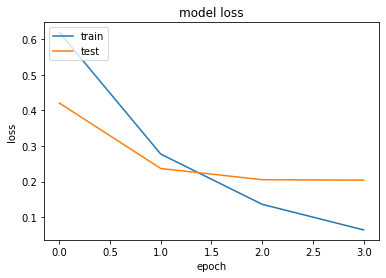

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
sample = 200
test = pd.concat([data[data.polarity == 1].tail(sample), 
                        data[data.polarity == -1].tail(sample)])

In [ ]:
X_t = test.cleaned_text.values
Y_t = np.asarray(test.polarity.values).astype('float32')
Y_t = Y_t.clip(0, 1)

In [ ]:
X_t = tokenizer.texts_to_sequences(X_t)
X_t = pad_sequences(X_t, padding='post', maxlen=maxlen)

In [ ]:
pred = cnn_model.predict(X_t, verbose=True)

13/13 [==============================] - 0s 14ms/step


In [ ]:
pred.shape

(400, 1)

In [ ]:
df_t = pd.DataFrame({'REAL': Y_t, 
                         'PRED': pred.reshape(pred.shape[0],), 
                         'TEXT': test.cleaned_text})
df_t = df_t.reset_index()[['REAL', 'PRED', 'TEXT']]
df_t.PRED = df_t.PRED.round()
error_records = df_t[df_t.REAL != df_t.PRED]

In [ ]:
df_t.sample(n=5)

,REAL,PRED,TEXT
261,0.0,0.0,غرفه قذره ومكتب استقبال وقح وقد مكثنا هناك ليا...
80,1.0,0.0,سعيد زياره فندق ما للمره الاولي دائما ما يكون ...
245,0.0,0.0,ليله رهيبه بسبب زياره الامن في منتصف الليل هذا...
383,0.0,0.0,بحاجه الي تطوير كبير فريق العمل قاس للغايه وغي...
350,0.0,0.0,رفعوا السعر بمقدار ثلاثه اضعاف خلال ثلاث سنوات...


In [ ]:
test = [
        'قال ابراهيم النقاش انه سعيد بتواجِده مع الذمامرة ',
        'بانون يعاني من سوء التغدية',
        'سعد الدين العثماني يلوح بالإستقالة في حالة إستمرار الضغوطات من داخل حزب المصباح',
        'خروج مواطنة عن صمتهاقرار الحكومة المغربية سعد الدين العثماني يغضب المواطنين خسائر بشرية و مادية',
        'إنها حكومة و نظام فاشل بكل المقاييس حان وقت التغيير',
        'مهزلة كارثة بما في الكلمة من معنى حسبنا الله ونعم الوكيل تحياتي اخي العزيز العشابي',
        'رحلتي الي دهب لم يخربها غير فندق باندا تم تحويل حجزي من فندق محترم الي فندق باندا لعدم وجود اماكن الاستقبال حوالي دقيقه للتسكين بالغرف الغرفه غير سيئه ولكن المكيف يسرب مياه علي السرير غرفه عند اخذ شاور المياه تخرج من البلاعه مصحوبه برائحه حمام السباحه جيد بالرغم من صغره حمامات الرسيبشن صغيره وغير نظيفه اللوبي صغير جدا اماكن انتظار السيارات تكفي سيارات منهم مكان لصاحب الفندق المطعم اشبه ما يكون بمطعم مدينه الطلبه الاماكن غير كافيه الطعام اقل من المتوسط كا نوعيه وكميات اكثر ما ضايقني في المطعم وجود ماللك الفندق واسره بالمطعم وتصرفاتهم كانت غير مرضيه من صوت عالي واستهزاء بالاخيرين وسوء معاملتهم للعاملين بالمطعم عموما من يريد اجازه سعيده يذهب الي فندق اخر'
        
]

In [ ]:
testx = tokenizer.texts_to_sequences(test)


In [ ]:
testx = pad_sequences(testx, padding='post', maxlen=maxlen)


In [ ]:
pred = cnn_model.predict(testx)


In [ ]:
#une fonction de prediction: 
def predict(pred):
  for sent in pred[:3]:
    if sent > 0.5:
      print('positive')
    else:
      print('Negative')

In [ ]:
predict(pred)

positive
positive
positive


In [ ]:
    text = 'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ'
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(tashkeel,"", text)

In [ ]:
text

'الحمد لله رب العالمين'